In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt, mpld3
from mpl_toolkits.mplot3d import Axes3D

## Signal and spectrogram

In [2]:
from scipy.io import wavfile
rate, signal = wavfile.read("NST_Arpeggios_C_Audio.wav")
ns = signal.shape[0]
t = np.linspace(0, ns/rate, ns)

c:\Python27\lib\site-packages\matplotlib\axes\_axes.py:6679: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


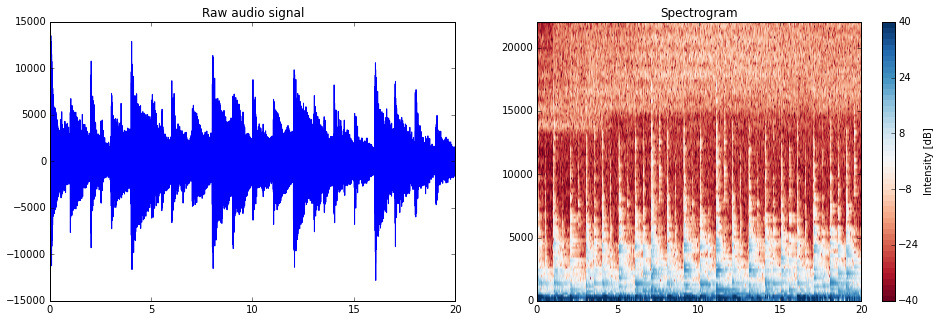

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(t, signal[:,0])
ax1.set_title('Raw audio signal')
#ax2.specgram(signal[:,0], Fs=rate)
Pxx, freqs, bins, im = ax2.specgram(signal[:,0], Fs=rate, cmap="RdBu")
ax2.set_ylim([0,max(freqs)])
ax2.set_title('Spectrogram');
bound = np.linspace(-40,40, 51)
cb = fig.colorbar(im, boundaries=bound, ticks=bound[::10])
cb.set_label('Intensity [dB]')
cb.set_clim(-40, 40)

# Embedded figures and JSON figures with mpld3

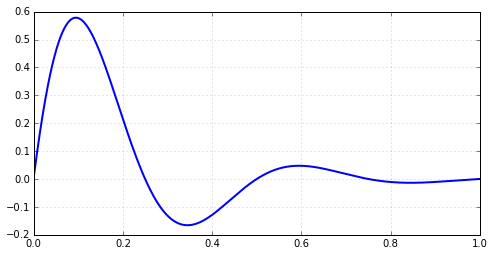

In [4]:
plt.figure(figsize=(8,4))
x = np.linspace(0, 1, 1000)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)
plt.plot(x, y, lw=2)
plt.grid(True, lw=1, color='black', alpha=0.2)
plt.show()

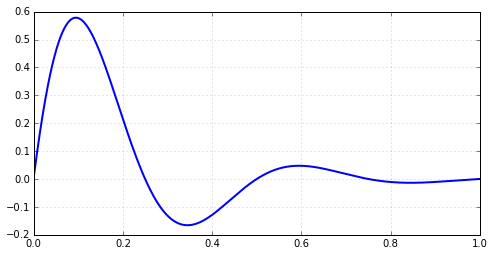

In [5]:
mpld3.enable_notebook()
plt.figure(figsize=(8,4))
x = np.linspace(0, 1, 1000)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)
plt.plot(x, y, lw=2)
plt.grid(True, lw=1, color='black', alpha=0.2)
plt.show()

### Contour plot with mpld3

In [6]:

alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p)*np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)


In [7]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T


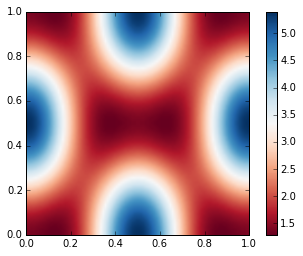

In [8]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap="RdBu", vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)